# Investigating the Chemical Properties of Drinking Water: A Statistical Analysis of pH and Conductivity in Potable and Non-Potable Water Sources
### Group 34: Roberto Mulliadi, Brian Suharianto, Yuxin Chen, Angelina Hsu

## Introduction
Access to potable water is crucial for various human activities, including domestic use, agriculture, energy production, industrial development, and poverty reduction. These help society achieve economic prosperity (World Health Organization, 2022). Understanding the factors that affect water potability can help us determine the steps to take in order to better water treatment practices and health standards. 

Our project analyzes how the pH levels and conductivity of water affect its potability. We will carry out hypothesis testing and construct confidence intervals based on the Water Potability Dataset from __[Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability)__, which includes data collected from 3276 distinct water bodies across the world. 

The point estimate will be the difference in means for both pH and conductivity, and the sample standard deviation will be the measure of variability due to the unknown population distribution. The population of interest is all potentially potable water bodies worldwide.

##### Definitions
- Conductivity (numerical): Amount of dissolved ions and salts in the water.
- pH (numerical): Concentration of hydrogen ions present in the water.

## Research Question
How do pH levels and conductivity affect the potability of all potential sources of drinking water worldwide?

Hypotheses for pH levels ($\mu_1$ is the mean pH level of potable water and $\mu_2$ is the mean pH level of non-potable water)

$H_0: \mu_1 - \mu_2 = 0$ 

$H_A: \mu_1 - \mu_2 \neq 0$

Hypotheses for Conductivity ($\mu_1$ is the mean Conductivity of potable water and $\mu_2$ is the mean Conductivity of non-potable water)

$H_0: \mu_1 - \mu_2 = 0$ 

$H_A: \mu_1 - \mu_2 \neq 0$

## Preliminary Data Analysis
Load the dataset, standardize all columns except Potability, and check the linear correlation between the 9 variables. The correlation matrix shows no significant linear correlations.

In [33]:
# The following libraries are required to run and visualize the dataset
library(tidyverse, quietly = TRUE)
library(dplyr, quietly = TRUE)
install.packages("infer", quietly = TRUE)
library(infer, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(tidyr, quietly = TRUE)
install.packages("cowplot", quietly = TRUE)
library(cowplot, quietly = TRUE)
library(gridExtra, quietly = TRUE)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [34]:
water_data <- read_csv(url("https://raw.githubusercontent.com/robertomulliadi/STAT201-Project/main/water_potability%20(1).csv"))
head(water_data, 6)

Rows: 3276 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.558279,31.99799,4.075075,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,0.2591551,-0.1394495830,0.1123977,0.8388053,1.70869338,-1.1804704,1.273240605,-1.2861012,0
2,-2.1104392,-2.0361028,-0.3859277338,-0.3076467,NA,2.06226017,0.2705559,-0.622393287,0.6841135,0
3,0.6387237,0.8475354,-0.2400106967,1.3603862,NA,-0.09401776,0.7809976,0.001471379,-1.1671873,0
4,0.7752344,0.5475678,0.0004932291,0.5919175,0.5579943,-0.77871108,1.2549429,2.098631452,0.8482820,0
5,1.2616222,-0.4643582,-0.4601783194,-0.3636424,-0.5707833,-0.34388641,-0.8242313,-2.126632600,0.1387643,0
6,-0.9387754,-0.2450192,0.7680379557,0.2669421,-0.1713654,-1.80314114,-1.7790047,-0.709639884,-1.8030621,0


NULL


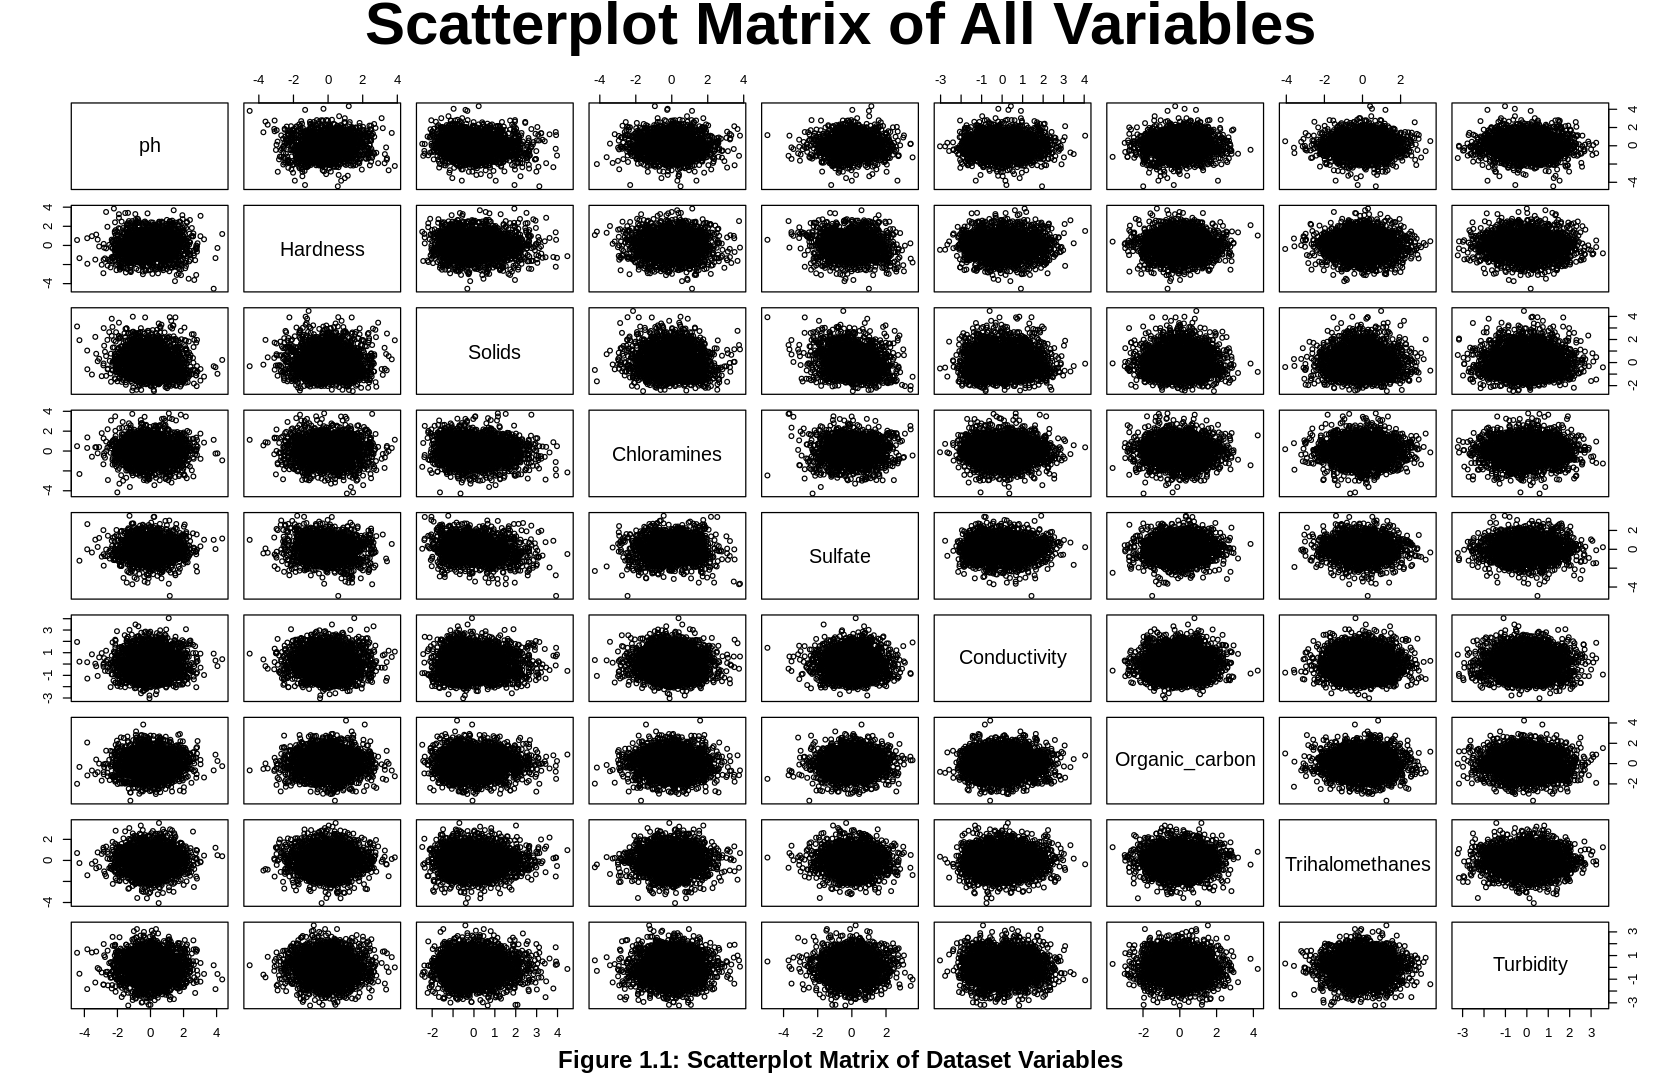

In [154]:
# Resizing the width and height of plots for better/clearer visualization
options(repr.plot.width = 14, repr.plot.height = 9)

# Standardizing all columns except for Potability
water_data_standardized <- scale(water_data[1:9], center = TRUE) |>
    cbind(water_data[10])
head(water_data_standardized, 6)

# Creating a scatterplot matrix of all variables in the dataset
water_scatterplot_matrix <- water_data_standardized[,1:9] |>
    pairs(labels = colnames(water_data_standardized[,1:9]),
          main = "Scatterplot Matrix of All Variables",
          cex = 0.8,
          cex.labels = 1.5,
          cex.main = 3) +
    geom_point(alpha = 0.1) 

caption <- "Figure 1.1: Scatterplot Matrix of Dataset Variables"

water_scatterplot_with_caption <- title(main = caption, xlab = NULL, ylab = NULL, outer = TRUE, line = -44.5, cex.main = 1.2)

print(water_scatterplot_with_caption)

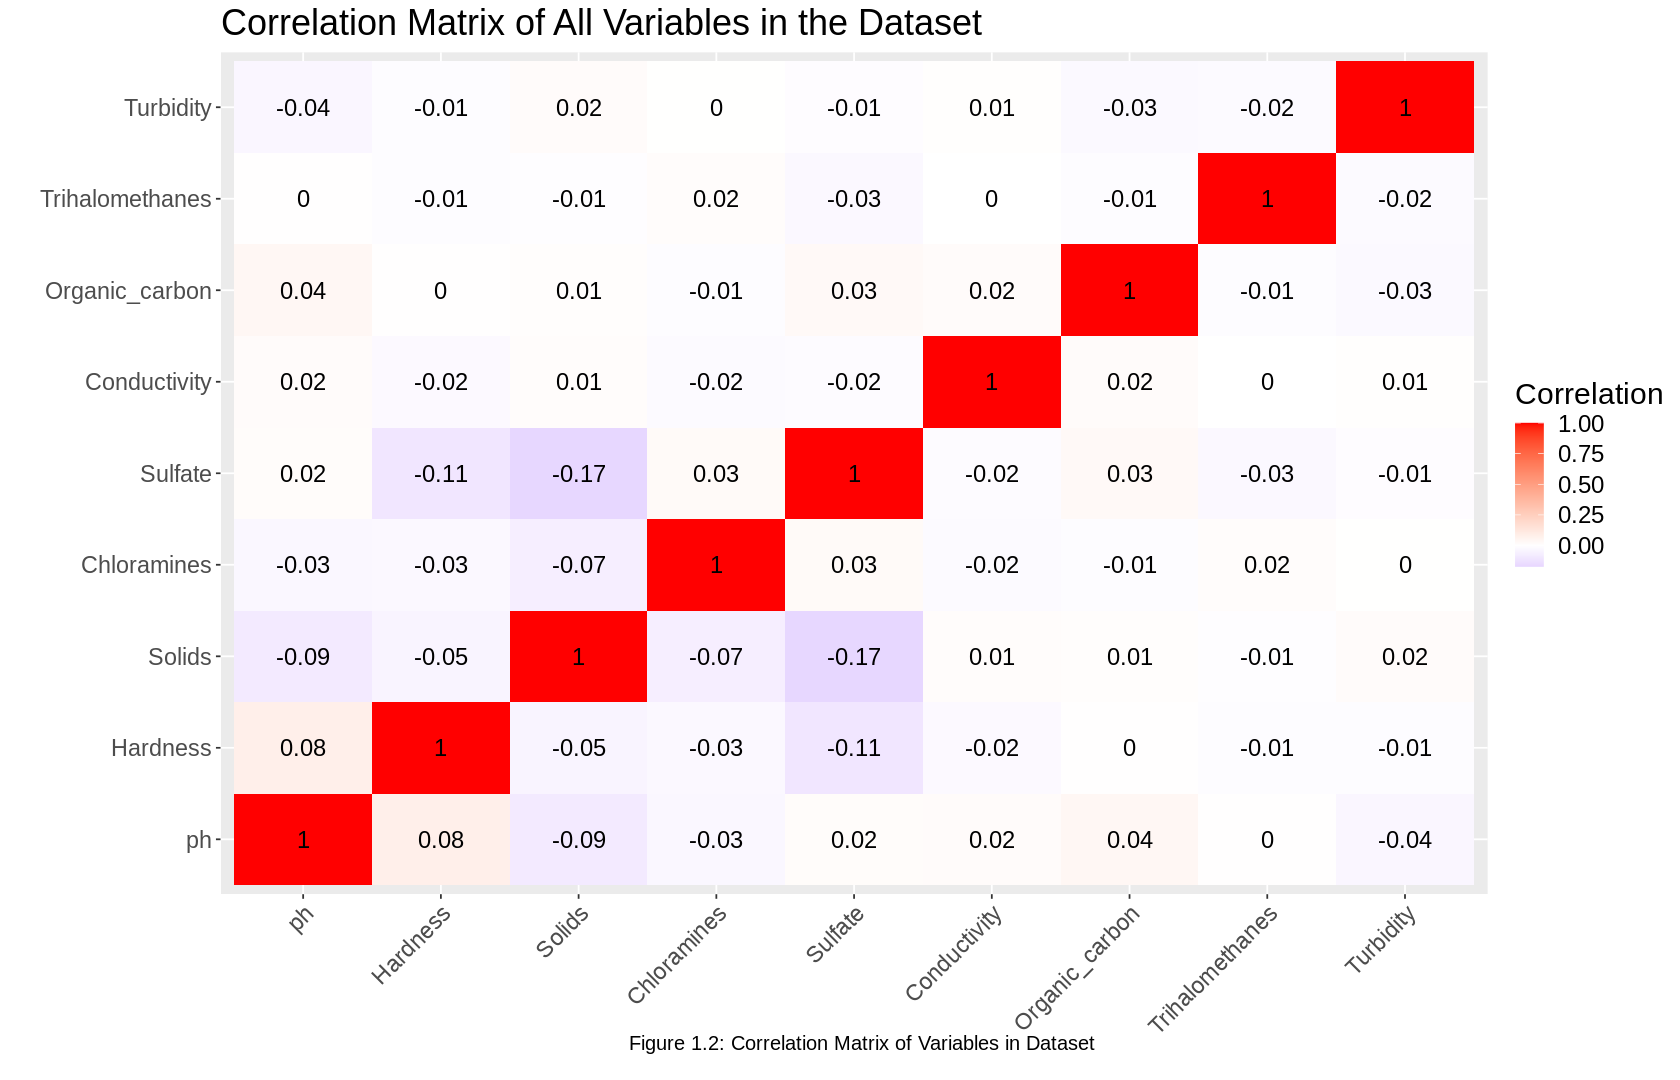

In [157]:
# Create a dataframe with the first and other 8 columns (excluding the 10th)
water_data_corr <- water_data_standardized[, 1:9]

# Compute the correlation matrix while removing any missing values
cor_matrix <- cor(water_data_corr, use = "pairwise.complete.obs")

# Convert the correlation matrix to a long format
cor_matrix_long <- reshape2::melt(cor_matrix)

# Create a correlation matrix plot using ggplot2
cor_matrix_plot <- ggplot(cor_matrix_long, aes(x = Var1, y = Var2, fill = value)) +
        geom_tile() +
        scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
        geom_text(aes(label = round(value, 2)), size = 5) +
        theme(text = element_text(size = 18)) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14)) +
        theme(axis.text.y = element_text(size = 14)) +
        ggtitle("Correlation Matrix of All Variables in the Dataset") +
        labs(x = "", y = "", fill = "Correlation")

caption <- "Figure 1.2: Correlation Matrix of Dataset Variables"

grid_with_caption <- ggdraw(cor_matrix_plot) +
  draw_label(caption, x = 0, y = 1, hjust = -1.35, vjust = 75, size = 12)

print(grid_with_caption)


Split the dataset into two categories based on Potability values: 1 indicates drinkable water, and 0 indicates non-drinkable. Then, select only pH and Conductivity variables while removing missing values.

In [87]:
# Splitting the dataset into potable and non-potable water
# Potable water data
water_data_potable <- water_data |>
    filter(Potability == 1, !is.na(ph), !is.na(Conductivity)) |>
    select(ph, Conductivity, Potability)
head(water_data_potable, 5)
nrow(water_data_potable)

# Non potable water data
water_data_non_potable <- water_data |>
    filter(Potability == 0, !is.na(ph), !is.na(Conductivity)) |>
        select(ph, Conductivity, Potability)
head(water_data_non_potable, 5)
nrow(water_data_non_potable)


ph,Conductivity,Potability
<dbl>,<dbl>,<dbl>
9.445130,592.6590,1
9.024845,451.1435,1
6.800119,376.4566,1
7.174135,315.5499,1
7.657991,416.6242,1


[1] 1101

ph,Conductivity,Potability
<dbl>,<dbl>,<dbl>
3.716080,592.8854,0
8.099124,418.6062,0
8.316766,363.2665,0
9.092223,398.4108,0
5.584087,280.4679,0


[1] 1684

Plot the distributions of both variables in each sample. Note that pH and conductivity are approximately normal.

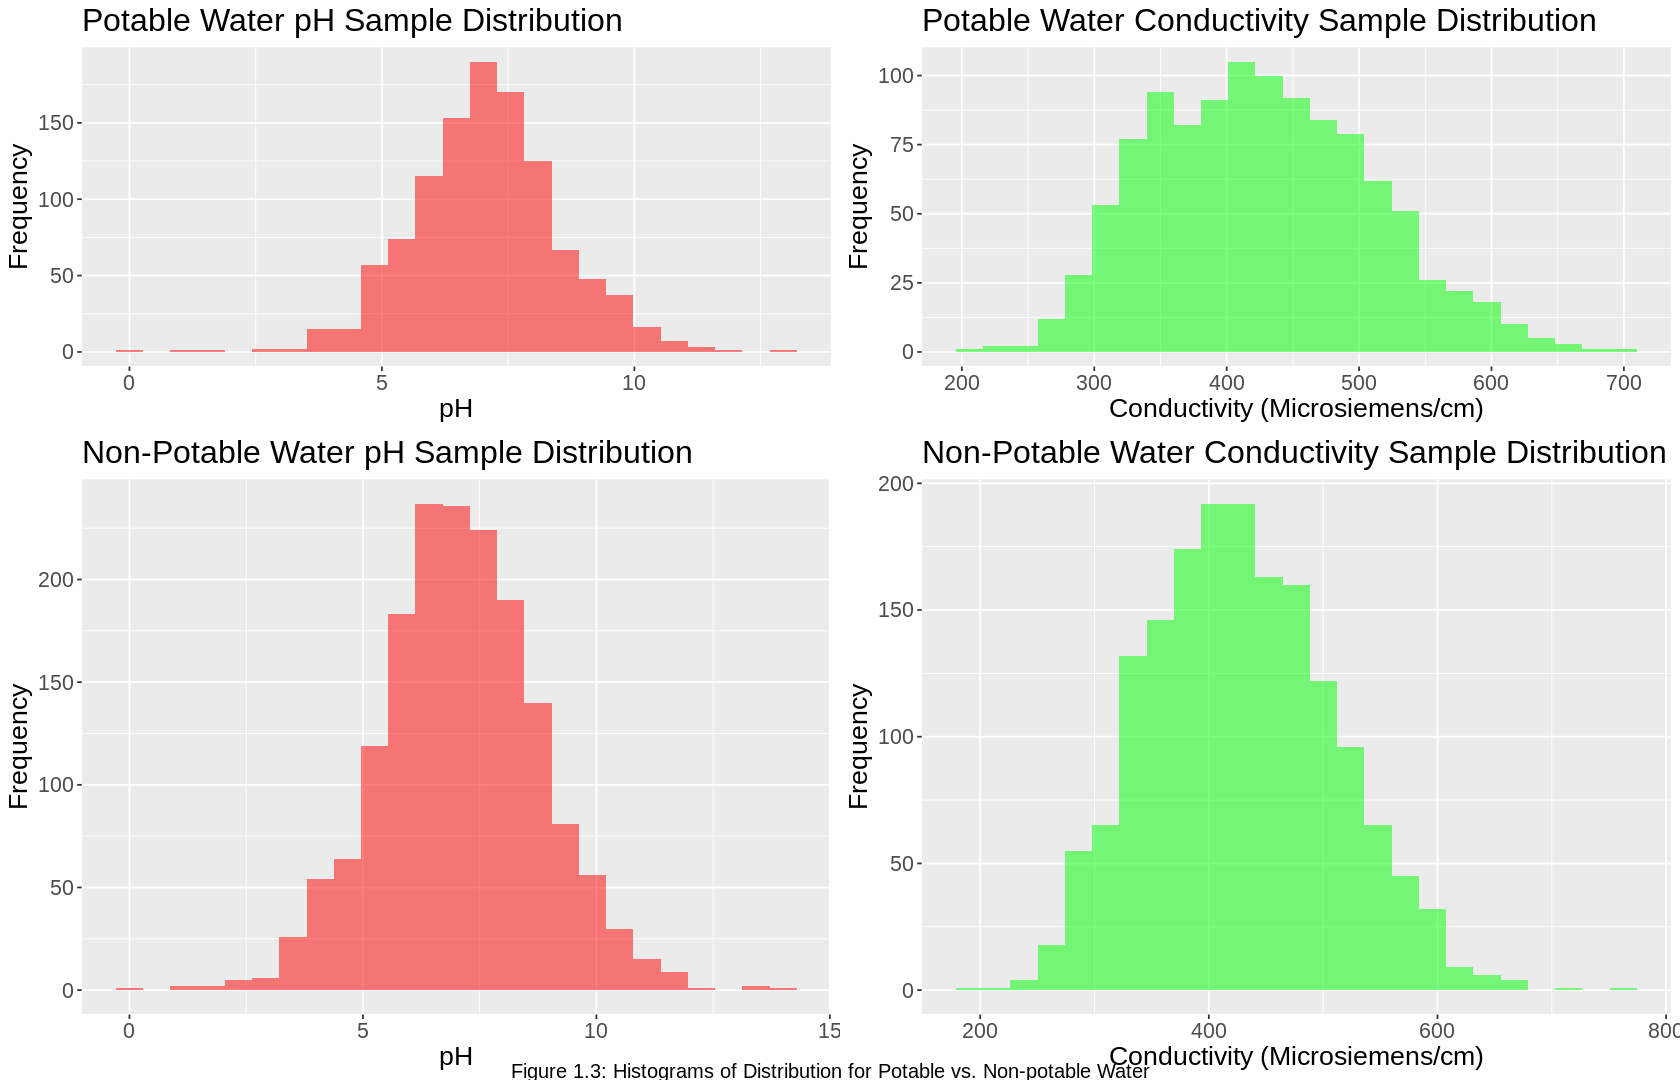

In [92]:
# Plotting the distribution of ph and Conductivity for potable water
# Create histogram for pH of potable water
potable_water_ph <- ggplot(water_data_potable, aes(x = ph)) +
    geom_histogram(alpha = 0.5, bins = 25, fill = "red") +
    labs(title = "Potable Water pH Sample Distribution",
         x = "pH",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Create histogram for Conductivity of potable water
potable_water_conductivity <- ggplot(water_data_potable, aes(x = Conductivity)) +
    geom_histogram(alpha = 0.5, bins = 25, fill = "green") +
    labs(title = "Potable Water Conductivity Sample Distribution",
         x = "Conductivity (Microsiemens/cm)",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Plotting the distribution of ph and Conductivity for non-potable water
# Create histogram for pH of non-potable water
non_potable_water_ph <- ggplot(water_data_non_potable, aes(x = ph)) +
    geom_histogram(alpha = 0.5, bins = 25, fill = "red") +
    labs(title = "Non-Potable Water pH Sample Distribution",
         x = "pH",
         y = "Frequency") +
    theme(text = element_text(size = 16))

# Create histogram for Conductivity of non-potable water
non_potable_water_conductivity <- ggplot(water_data_non_potable, aes(x = Conductivity)) +
    geom_histogram(alpha = 0.5, bins = 25, fill = "green") +
    labs(title = "Non-Potable Water Conductivity Sample Distribution",
         x = "Conductivity (Microsiemens/cm)",
         y = "Frequency") +
    theme(text = element_text(size = 16))

caption <- "Figure 1.3: Histograms of Distribution for Potable vs. Non-potable Water"

# Combine all histograms into a single plot
combined_plot <- plot_grid(potable_water_ph, potable_water_conductivity,
                              non_potable_water_ph, non_potable_water_conductivity,
                              ncol = 2, rel_heights = c(2, 3))

grid_with_caption <- ggdraw(combined_plot) +
  draw_label(caption, x = 0, y = 1, hjust = -0.8, vjust = 77, size = 12)

print(grid_with_caption)
    

Then calculate the point estimates so that we have an estimate of the unknown population parameter.

In [93]:
# Calculating the mean pH and conductivity of potable water, along with variance
potable_statistics <- water_data_potable |>
    summarize(mean_ph = mean(ph),
              mean_conductivity = mean(Conductivity),
              var_ph = var(ph),
              var_conductivity = var(Conductivity),
              n = n())
potable_statistics

# Calculating the mean pH and conductivity of non-potable water, along with variance
non_potable_statistics <- water_data_non_potable |>
    summarize(mean_ph = mean(ph),
              mean_conductivity = mean(Conductivity),
              var_ph = var(ph),
              var_conductivity = var(Conductivity),
              n = n())
non_potable_statistics

mean_ph,mean_conductivity,var_ph,var_conductivity,n
<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.073783,426.5484,2.096843,6724.219,1101


mean_ph,mean_conductivity,var_ph,var_conductivity,n
<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.085378,427.4242,2.834169,6447.798,1684


In [94]:
# Calculating the difference in means of pH and conductivity of potable vs non-potable water
point_estimate_ph <- potable_statistics$mean_ph - non_potable_statistics$mean_ph
point_estimate_conductivity <- potable_statistics$mean_conductivity - non_potable_statistics$mean_conductivity

# Creating a table to present the point estimates
point_estimates <- data.frame(
    diff_in_means_ph = c(point_estimate_ph),
    diff_in_means_conductivity = c(point_estimate_conductivity)
)
point_estimates

diff_in_means_ph,diff_in_means_conductivity
<dbl>,<dbl>
-0.01159514,-0.875791


Next we calculate the test statistic for both two-sample t-tests using the formula:
$$
T = \frac{\bar{x}_{\text{potable}} - \bar{x}_{\text{non-potable}}}{\sqrt{\frac{s^2_{\text{potable}}}{n_1}+\frac{s^2_{\text{non-potable}}}{n_2}}}
$$

In [95]:
# Calculating the test statistic for pH 
test_statistic_ph <- (point_estimates$diff_in_means_ph) / 
                        sqrt((potable_statistics$var_ph/nrow(water_data_potable)) + 
                             (non_potable_statistics$var_ph/nrow(water_data_non_potable)))

# Calculating the test statistic for Conductivity
test_statistic_conductivity <- (point_estimates$diff_in_means_conductivity) / 
                        sqrt((potable_statistics$var_conductivity/nrow(water_data_potable)) + 
                             (non_potable_statistics$var_conductivity/nrow(water_data_non_potable)))

# Print test statistics for each test
cat("Test Statistic for pH Level: ", test_statistic_ph, "\n")
cat("Test Statistic for Conductivity: ", test_statistic_conductivity)

Test Statistic for pH Level:  -0.193589 
Test Statistic for Conductivity:  -0.2778367

Then we calculate the degrees of freedom using the Welch-Satterthwaite equation since the sample sizes are different and variance for both samples are unequal, and then round it down to the nearest integer value:
$$
\nu = \frac{
    \left(\frac{s_{Chinstrap}^2}{n_1}+\frac{s_{Adelie}^2}{n_2}\right)^2
}
{
\frac{s_{Chinstrap}^4}{n_1^2(n_1-1)}+\frac{s_{Adelie}^2}{n_2^2(n_2-1)}
}
$$

In [96]:
# Degrees of Freedom for pH hypothesis test
v_ph <- ((potable_statistics$var_ph/potable_statistics$n) + 
      (non_potable_statistics$var_ph/non_potable_statistics$n))^2/
     ((potable_statistics$var_ph)^2/(1101^2*1100) + 
      (non_potable_statistics$var_ph)/(1684^2*1683))
v_ph = floor(v_ph)

# Degrees of Freedom for conductivity hypothesis test
v_conductivity <- ((potable_statistics$var_conductivity/potable_statistics$n) + 
      (non_potable_statistics$var_conductivity/non_potable_statistics$n))^2/
     ((potable_statistics$var_conductivity)^2/(1101^2*1100) + 
      (non_potable_statistics$var_conductivity)/(1684^2*1683))
v_conductivity = floor(v_conductivity)
     
#Table for Degrees of Freedom
v <- data.frame(v_ph, v_conductivity)
names(v) <- c("dof_ph", "dof_conductivity")
v

dof_ph,dof_conductivity
<dbl>,<dbl>
3307,2911


Now we have everything we need to conduct each hypothesis test to find the p-values. 

In [97]:
# Calculate the p-values for each hypothesis test
p_value_ph <- 2*pt(test_statistic_ph, df = 3307, lower.tail = TRUE)
p_value_conductivity <- 2*pt(test_statistic_conductivity, df = 2911, lower.tail = TRUE)

# Show the p-values in a data frame
p_values <- data.frame(p_value_ph, p_value_conductivity)
p_values

p_value_ph,p_value_conductivity
<dbl>,<dbl>
0.8465096,0.7811574


Next, we can construct the confidence intervals for each variable (mean difference in pH and Conductivity) via bootstrapping first. We will generate a bootstrap distribution of these statistics of interest and use it to construct the respectice confidence intervals.

lower_bound_ph,upper_bound_ph
<dbl>,<dbl>
-0.1196208,0.1045106


lower_bound_conductivity,upper_bound_conductivity
<dbl>,<dbl>
-7.493901,5.026833


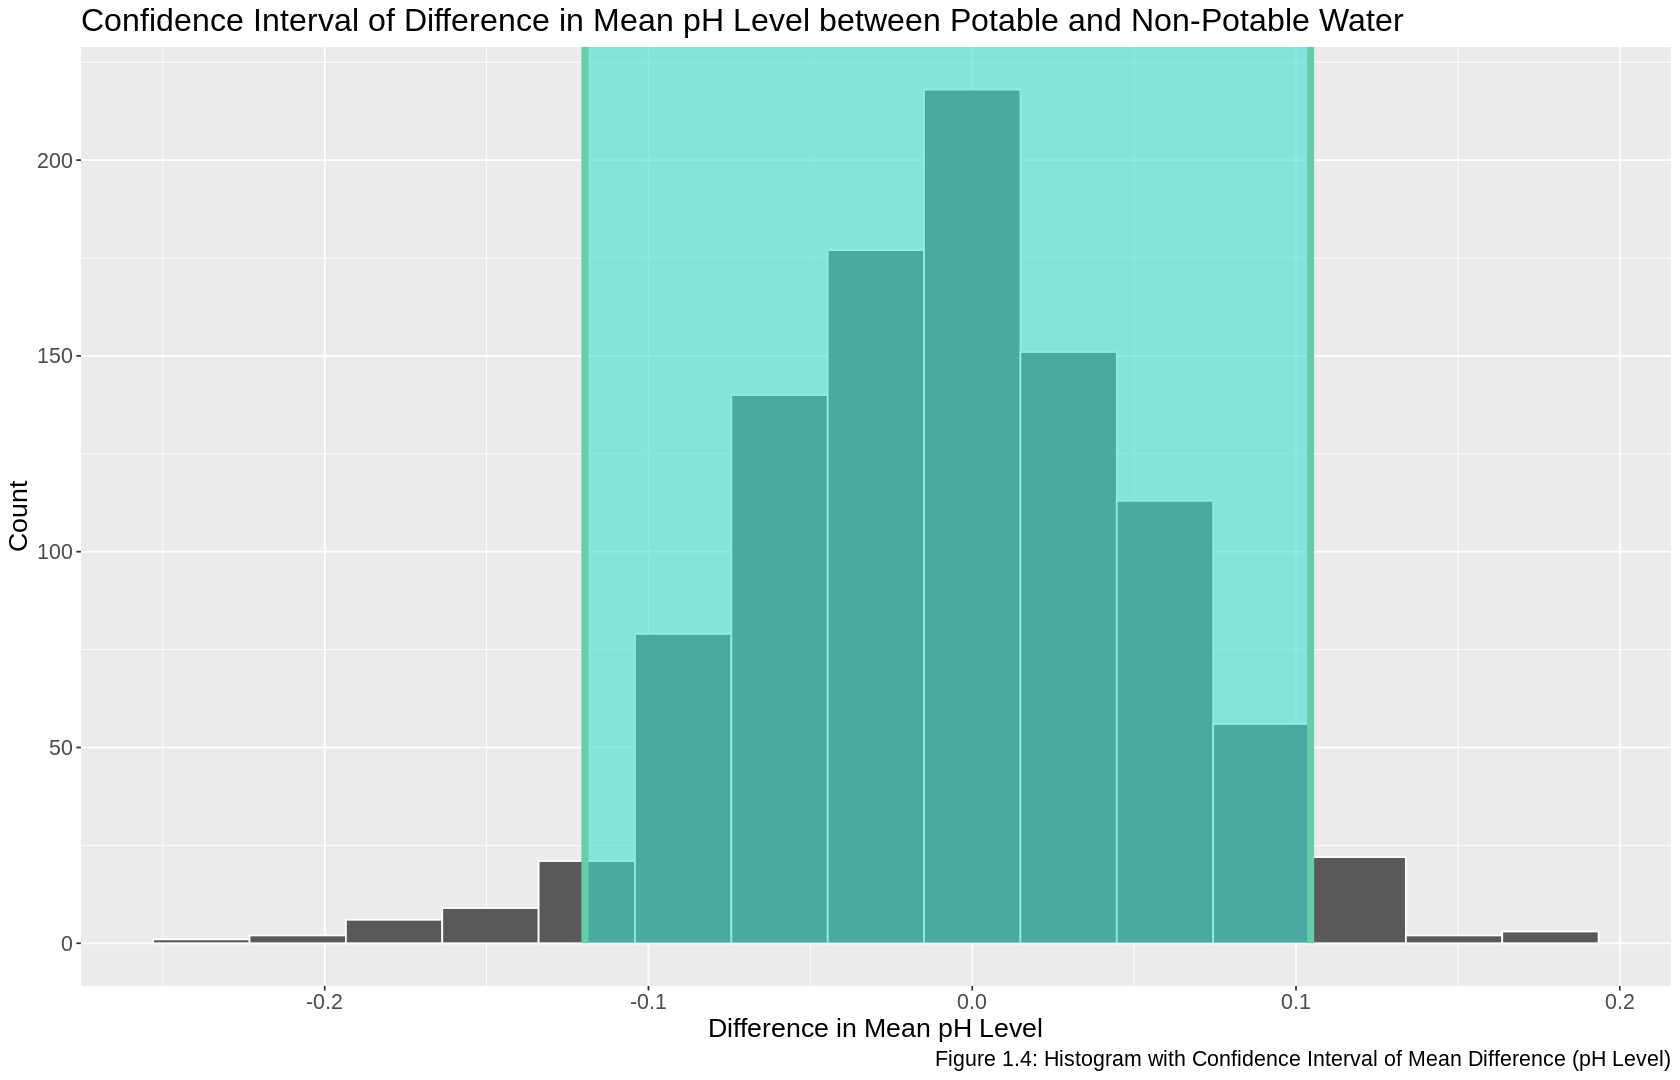

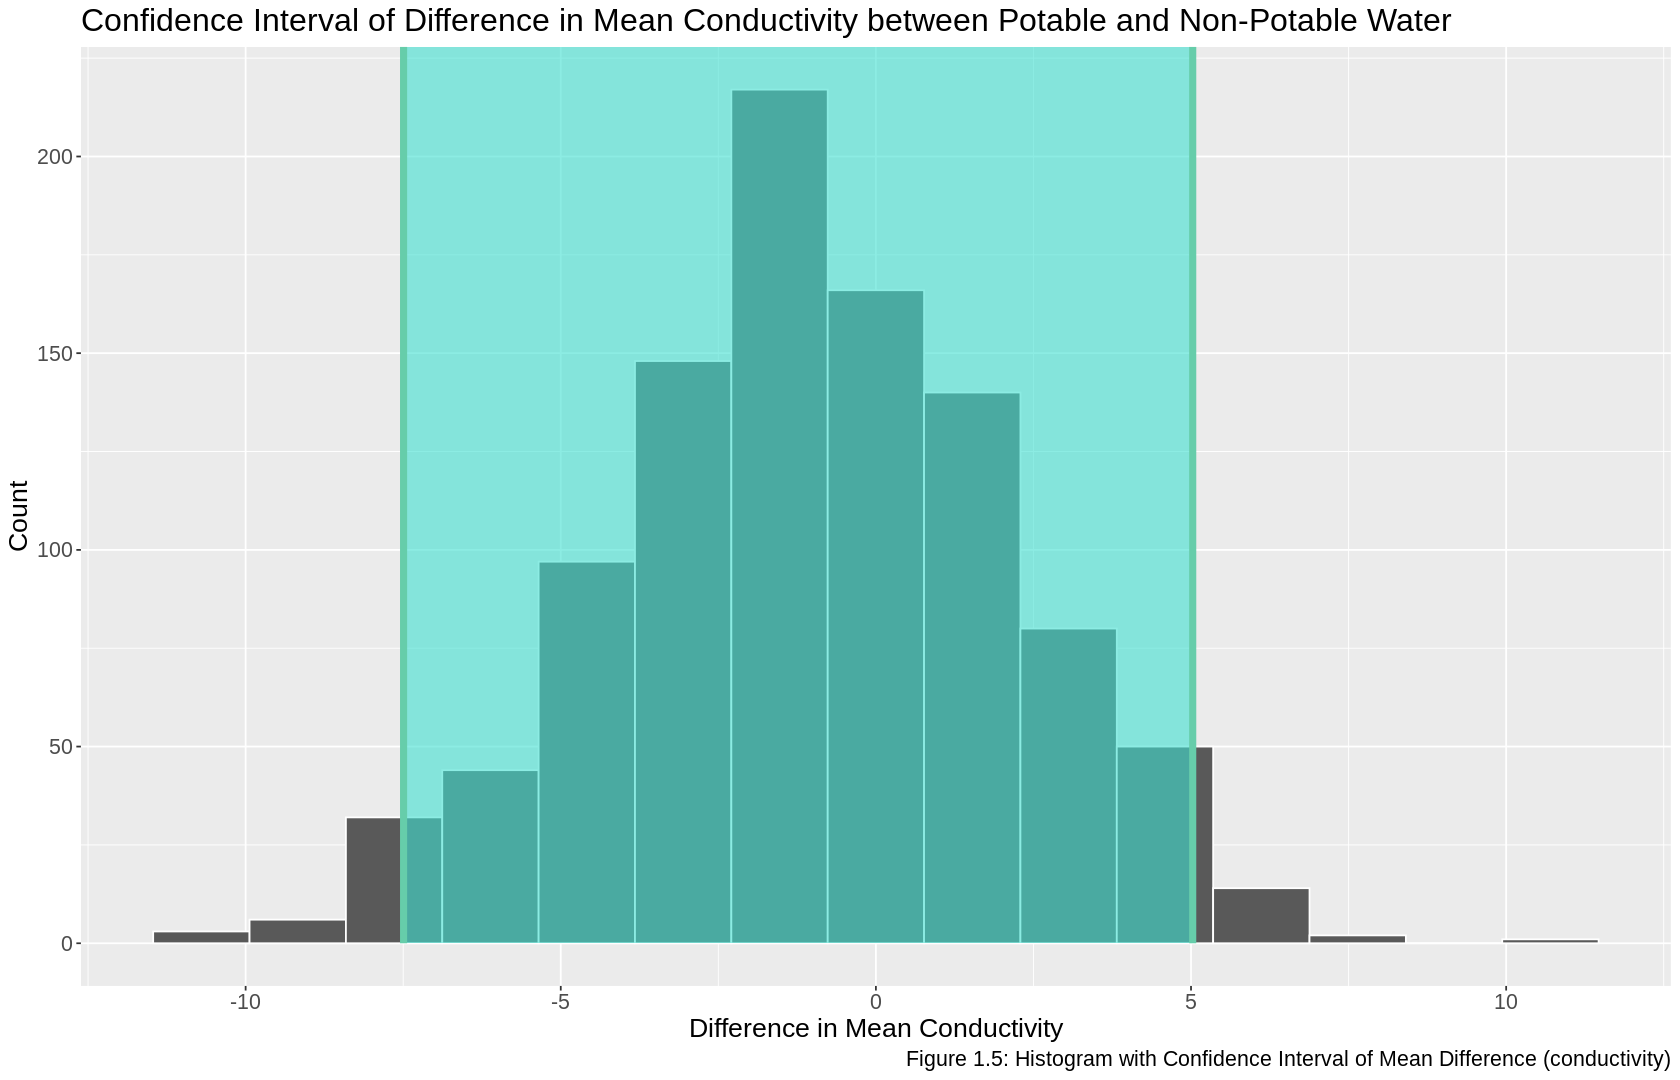

In [158]:
set.seed(123)
# Constructing confidence interval for difference in mean pH Level
# Mapping Potability column into factors
water_data_potability_mutated <- water_data |>
    mutate(Potability_mapped = case_when(Potability == 0 ~ "Non-potable", Potability == 1 ~ "Potable")) |>
    filter(!is.na(ph), !is.na(Conductivity))

# Generate the bootstrap distribution and calculate the difference in mean pH statistic
bootstrap_dist_diff_means_ph <- water_data_potability_mutated |>
    specify(formula = ph ~ Potability_mapped) |>
    generate(reps = 1000, type = "bootstrap") |>
    calculate(stat = "diff in means", order = c("Potable", "Non-potable"))

# Get the percentile endpoints for the confidence interval
diff_means_ci_ph <- bootstrap_dist_diff_means_ph %>%
  get_ci(level = 0.95, type = "percentile")
names(diff_means_ci_ph) <- c("lower_bound_ph", "upper_bound_ph")
diff_means_ci_ph

# Visualize the confidence interval
ci_ph <- visualize(bootstrap_dist_diff_means_ph) +
    shade_ci(endpoints = diff_means_ci_ph) +
    labs(x = "Difference in Mean pH Level", 
         y = "Count", 
         title = "Confidence Interval of Difference in Mean pH Level between Potable and Non-Potable Water", 
         caption = "Figure 1.4: Histogram with Confidence Interval of Mean Difference (pH Level)") +
    theme(text = element_text(size = 16))
ci_ph

# Generate the bootstrap distribution and calculate the difference in mean Conductivity statistic
bootstrap_dist_diff_means_conductivity <- water_data_potability_mutated |>
    specify(formula = Conductivity ~ Potability_mapped) |>
    generate(reps = 1000, type = "bootstrap") |>
    calculate(stat = "diff in means", order = c("Potable", "Non-potable"))

# Get the percentile endpoints for the confidence interval
diff_means_ci_conductivity <- bootstrap_dist_diff_means_conductivity %>%
  get_ci(level = 0.95, type = "percentile")
names(diff_means_ci_conductivity) <- c("lower_bound_conductivity", "upper_bound_conductivity")
diff_means_ci_conductivity

# Visualize the confidence interval
ci_conductivity <- visualize(bootstrap_dist_diff_means_conductivity) +
    shade_ci(endpoints = diff_means_ci_conductivity) +
    labs(x = "Difference in Mean Conductivity", 
         y = "Count", 
         title = "Confidence Interval of Difference in Mean Conductivity between Potable and Non-Potable Water",
         caption = "Figure 1.5: Histogram with Confidence Interval of Mean Difference (conductivity)") +
    theme(text = element_text(size = 16))
ci_conductivity

We can then compare this confidence interval to one that is constructed using asymptotics

In [58]:
# Using Asymptotics to construct confidence intervals
# Calculate z statistic for 95% confidence interval
z <- qnorm(0.975)

# Constructing Confidence Interval for diff in mean pH Level
sd_diff_ph <- sqrt(potable_statistics$var_ph/potable_statistics$n + non_potable_statistics$var_ph/non_potable_statistics$n)
lower_ci <- point_estimate_ph - z*sd_diff_ph
upper_ci <- point_estimate_ph + z*sd_diff_ph
ci_ph_asymptotics <- data.frame(lower_ci, upper_ci)
names(ci_ph_asymptotics) = c("lower_ci_ph", "upper_ci_ph")
ci_ph_asymptotics

# Constructing Confidence Interval for diff in mean COnductivity
sd_diff_ph <- sqrt(potable_statistics$var_conductivity/potable_statistics$n + 
                   non_potable_statistics$var_conductivity/non_potable_statistics$n)
lower_ci <- point_estimate_conductivity - z*sd_diff
upper_ci <- point_estimate_conductivity + z*sd_diff
ci_conductivity_asymptotics <- data.frame(lower_ci, upper_ci)
names(ci_conductivity_asymptotics) = c("lower_ci_conductivity", "upper_ci_conductivity")
ci_conductivity_asymptotics

lower_ci_ph,upper_ci_ph
<dbl>,<dbl>
-0.1289884,0.1057982


lower_ci_conductivity,upper_ci_conductivity
<dbl>,<dbl>
-0.9931843,-0.7583977


Finally, we can visualize the null distribution and visualize our results for each hypothesis test

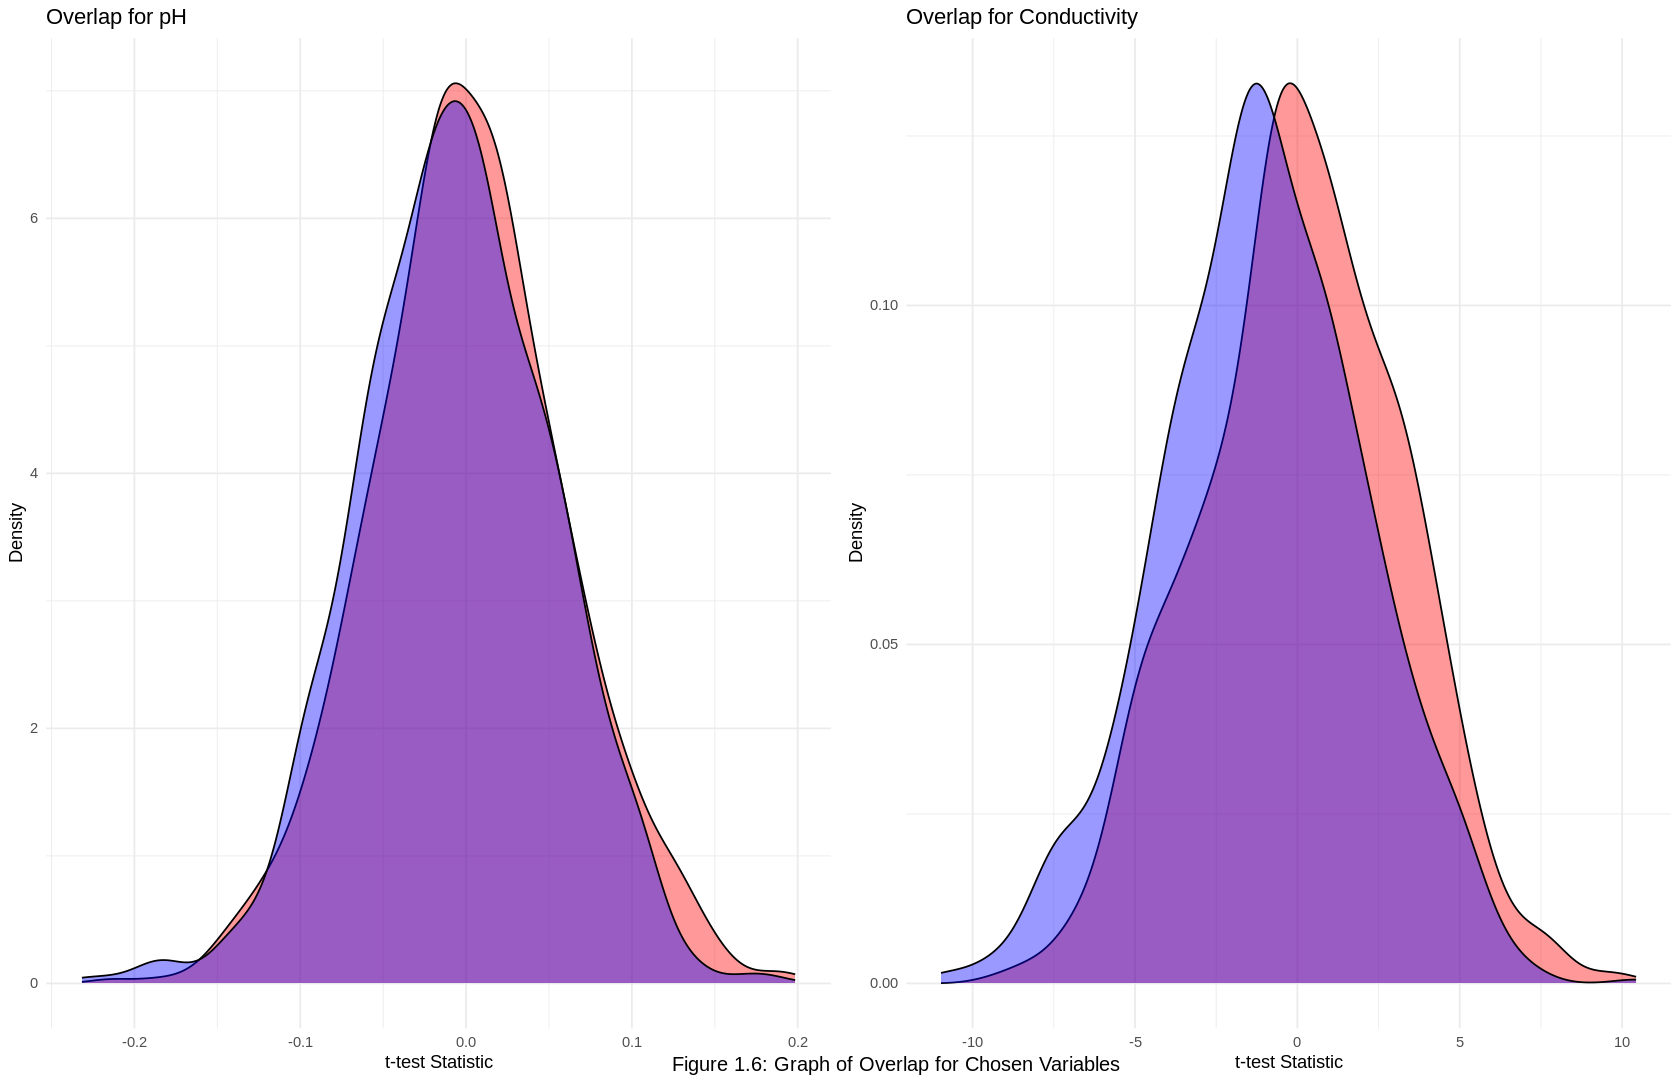

In [114]:
# Create the null distribution of diff in mean pH levels
null_dist_ph <- water_data_potability_mutated |>
    specify(formula = ph ~ Potability_mapped) |>
    hypothesize(null = "independence") |>
    generate(reps = 1000, type = "permute") |>
    calculate(stat = "diff in means", order = c("Potable", "Non-potable"))

# Plot the overlap between the null distribution and the sampling (bootstrap) distribution of diff in mean pH Levels
overlap_ph<- ggplot() +
    geom_density(data = null_dist_ph, aes(x = stat, y = ..density..), fill = "red", alpha = 0.4) +
    geom_density(data = bootstrap_dist_diff_means_ph, aes(x = stat, y = ..density..), fill = "blue", alpha = 0.4) +
    labs(x = "t-test Statistic", y = "Density") +
    ggtitle("Overlap for pH") +
    theme(plot.margin = unit(c(1,0.5,1,1), "cm"), # Adjust left margin
        plot.title = element_text(hjust = 0.5), 
        plot.background = element_rect(fill = "white")) +
    theme(text = element_text(size = 22)) +
    theme_minimal()

# Create the null distribution of diff in mean Conductivity
null_dist_conductivity <- water_data_potability_mutated |>
    specify(formula = Conductivity ~ Potability_mapped) |>
    hypothesize(null = "independence") |>
    generate(reps = 1000, type = "permute") |>
    calculate(stat = "diff in means", order = c("Potable", "Non-potable"))

# Plot the overlap between the null distribution and the sampling (bootstrap) distribution of diff in mean Conductivity
overlap_conductivity <- ggplot() +
    geom_density(data = null_dist_conductivity, aes(x = stat, y = ..density..), fill = "red", alpha = 0.4) +
    geom_density(data = bootstrap_dist_diff_means_conductivity, aes(x = stat, y = ..density..), fill = "blue", alpha = 0.4) +
    labs(x = "t-test Statistic", y = "Density") +
    ggtitle("Overlap for Conductivity") +
    theme(plot.margin = unit(c(1,0.5,1,1), "cm"), # Adjust left margin
        plot.title = element_text(hjust = 0.5), 
        plot.background = element_rect(fill = "white")) + 
    theme(text = element_text(size = 22)) +
    theme_minimal()

# overlap_plot <- grid.arrange(overlap_ph, overlap_conductivity, ncol = 2)

caption = "Figure 1.6: Graph of Overlap for Chosen Variables"

overlap_plot_with_caption <- ggdraw(overlap_plot) +
  draw_label(caption, x = 0, y = 1, hjust = -1.5, vjust = 76.5, size = 12)

print(overlap_plot_with_caption)

## Results
#### Correlation Matrix and Sample Distributions
Starting from our scatter plot matrix, we were investigating the relationship between all the variables in the data set. From this, we found that there was no significant relationship observed between all the variables. Through literature, it was further supported that pH and conductivity had no correlation, which is why we chose them to be the factors in our testing.

From plotting the distribution of pH and conductivity in a histogram, we found that they were all approximately normal for both potable and non-potable water. After computing the two sample t-test statistics, we found that the p-value was greater than the significance level that we chose (0.05) so we didn’t reject the null hypothesis. This shows that there was no significant difference between potable and non-potable water in terms of pH and conductivity. 

#### Calculating the Mean pH Level and Conductivity for Potable and Non-potable Water
For pH, we found that the mean pH value was 7.074 for potable water and 7.085 for non-potable water. The difference in pH was found to be -0.0116.

For conductivity, we found that the mean conductivity value was 426.5 for potable water and 427.4 for non-potable water. The difference in conductivity was found to be -0.876.

#### Results of two sample t-tests
The p-values for the hypothesis test involving pH level and conductivity were 0.847 and 0.781 respectively. We can see that both values are greater than the 0.05 significance level.

#### Constructing Confidence Intervals
We then carried out the bootstrap method to construct the confidence interval. The lower confidence interval for pH was -0.120 and the upper confidence interval was 0.105. For conductivity, the lower confidence interval was -7.49 and the upper confidence interval was 5.03.

Next, using the asymptotic method, we found that the lower confidence interval for pH was -0.129 and the upper confidence interval was 0.106. For conductivity, the lower confidence interval was -0.993 and the upper confidence interval was -0.758.

We showed that the confidence intervals for both methods came out with different results. This is because the asymptotic method makes use of Normal approximation to calculate the intervals. Therefore, the bootstrap sample provides a more accurate estimate of the sampling distribution. The bootstrap sample also better takes into account the variability of the data, which can be seen in the wider confidence interval. 

#### Creating Overlap between Null Distribution and True Sampling Distribution
Next, we plotted the null distribution to the true sampling distribution for the observed mean difference in both pH and conductivity. We found that the true sampling distribution is very close to the null distribution. This implies that there is no significant difference between the pH and conductivity levels of potable and non-potable water.


## Methods: Plan
### Why our report is reliable
We ensured report reliability with random sampling, a large sample size, and consistent methods and outcomes with prior research. Robustness checks addressed potential concerns, and all results were transparently reported. All conditions of two-sample t-tests and confidence intervals were met.
<br>
Estimates offer valuable insights to stakeholders, but other factors may randomly influence the results. Additional information from existing literature and human factors may be necessary to make informed decisions about the complexity/uncertainty of the data. set.seed is used when we bootstrap to present reproducibility as well.

### Methodology:

1. Load libraries and data
2. Visualize and analyze correlations between variables
3. Split data into potable and non-potable water samples (Independent)
4. Analyze sample distributions
5. Conduct two-sample t-test on pH and conductivity
6. Calculate 95% confidence intervals via bootstrapping and compare it with asymptotics method
<br>
    (This allows us to quantify errors of our estimates)
7. Create the null distribution and plot its overlap with both bootstrap distributions for both tests 
8. Interpret results by rejecting or not rejecting the null hypotheses to establish statistical significance

To ensure reproducibility, we will document analysis steps, use version control, and share our code and data.

### Expected Outcomes and Significance
##### Difference in Mean pH Level
Prior research suggests significant differences in mean pH values between potable and non-potable water, but no significant difference in mean conductivity. This is what we expected going into our testing process. 

In terms of pH levels, further research also suggested that the “acidic nature of water is a characteristic of oligotrophic water bodies indicating its good quality” (Soni et al. 2013). When conducting our tests, we looked for two things:
Significant difference between potable and non-potable water
Non-potable water is more acidic 
Although we did not see a significant difference between potable and non-potable water, our results still concluded that potable water pH level was more acidic. Therefore, half of our expected outcomes were displayed in our findings.  

##### Difference in Mean Conductivity
In terms of conductivity, our research findings concluded that low conductivity value means that the water is more suitable to drink because there are less ions present (Chauhan et al., 2020). When conducting our tests, we looked for two things:
Low significant difference between potable and non-potable water
Non-potable water had a lower conductivity value
Our research findings showed a very low significant difference and also lower conductivity values in non-potable water. Therefore, all of our expected outcomes were displayed in our findings. 

We believe that there are different possible reasons that the significance of our results for pH may not have matched the findings of previous research. One possibility is p-value hacking. It is possible that the patterns we discovered from research were cherry picked from results that were more statistically significant. Another possible reason is that the time and region of the research is different from the time that the data set was sampled. Overall, we believe that more research would need to be conducted in order to determine why our findings were different.


#### Limitations
Data may be incomplete due to Earth's vast water content, and errors like Type I or Type II may arise. Publication bias and assumption of variance homogeneity may impact research reliability.


#### Project Impact
The analysis may have significant implications for water treatment, public health policies, and international standards for safe water. For instance, if high conductivity reduces potability, treatment plants could adapt their methods to mitigate the issue (Eun Jung Kim a et al., 2011).

We tested the effects of pH and conductivity on water quality and found that they have an impact on drinking water. However, this analysis is limited and there may be a risk of Type II error because no significant difference in pH level was found, which is different from our hypothesis. Nevertheless, future research on the impact of different water quality metrics on drinking water are based on this discovery. On the other hand, because of the vast water content of the Earth, the data we use may be incomplete. However, it does indicate to us that the more acidic pH level and the lower the conductivity, the more suitable it is for people to drink. 

The analysis may have significant implications for water treatment, public health policies, and international standards for safe drinking water. Water treatment facilities can use this knowledge to adjust water quality and continue working to improve water potability based on it.


#### Future Questions
- What specific treatment methods can be used to effectively address the effects of pH and conductivity on water potability?
- What are the long-term health effects of consuming water with varying pH and conductivity levels?
- What are other factors that affect water potability?











## References

- Canada, H. (2016, March 9). Government of Canada. Canada.ca. Retrieved March 18, 2023, from https://www.canada.ca/en/health-canada/services/publications/healthy-living/guidelines-canadian-drinking-water-quality-guideline-technical-document-ph.html

- Chauhan, J. S., Tarun, B., & Neha, B. (2020). Assessment of potability of spring water and its health implication in a hilly village of Uttarakhand, India. Applied Water Science. Retrieved April 6, 2023, from https://link.springer.com/article/10.1007/s13201-020-1159-6 

- Environmental Protection Agency. (n.d.). US Environmental Protection Agency. EPA. Retrieved March 18, 2023, from https://www.epa.gov/caddis-vol2/ph

- Eun Jung Kim a, a, b, High lead levels in drinking water are still a concern for households serviced by lead pipes in many parts of North America and Europe. p, O’Reilly, S. E., Mohapatra, M., Deshommes, E., Dando, K. J., Arai, Y., Bisogni, J. J., Copeland, R. C., Gerke, T. L., & Harsh, J. (2011, March 11). Effect of ph on the concentrations of lead and trace contaminants in drinking water: A combined batch, Pipe Loop and Sentinel Home Study. Water Research. Retrieved March 18, 2023, from https://www.sciencedirect.com/science/article/abs/pii/S004313541100090X

- Sofi, M. H., Gudi, R., Karumuthil-Melethil, S., Perez, N., Johnson, B. M., & Vasu, C. (2014, January 16). Ph of drinking water influences the composition of gut microbiome and type 1 diabetes incidence. American Diabetes Association. Retrieved March 18, 2023, from https://diabetesjournals.org/diabetes/article/63/2/632/34242/pH-of-Drinking-Water-Influences-the-Composition-of

- Soni VK, Visavadia M, Gosai C, Hussain MD, Mewada MS, Gor S, Salahuddin K (2013) Evaluation of physico-chemical and microbial parameters on water quality of Narmada River, India. Afr J Environ Sci Technol Vol.7(6), pp. 496-503

- What is the typical water conductivity range? Atlas Scientific. (2022, November 8). Retrieved March 18, 2023, from https://atlas-scientific.com/blog/water-conductivity-range/

- World Health Organization. (n.d.). Drinking-water. World Health Organization. Retrieved March 18, 2023, from https://www.who.int/news-room/fact-sheets/detail/drinking-water 

